Root Mean Squared Error (RMSE) after outlier removal: 1.0029910268791056


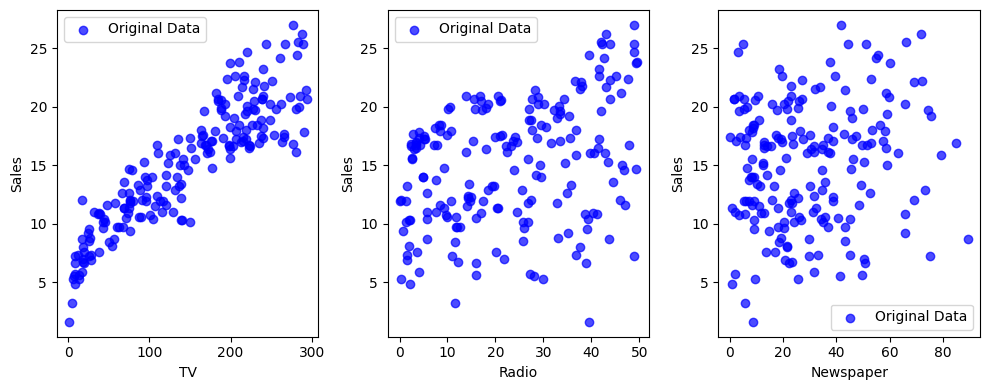


Comparison between original data and predictions:
        TV  Radio  Newspaper  Sales  Predicted_Sales
0    230.1   37.8       69.2   22.1           21.980
1     44.5   39.3       45.1   10.4           10.459
2     17.2   45.9       69.3   12.0           10.696
3    151.5   41.3       58.5   16.5           16.771
4    180.8   10.8       58.4   17.9           17.585
..     ...    ...        ...    ...              ...
195   38.2    3.7       13.8    7.6            7.859
196   94.2    4.9        8.1   14.0           13.383
197  177.0    9.3        6.4   14.8           15.704
198  283.6   42.0       66.2   25.5           25.568
199  232.1    8.6        8.7   18.4           18.140

[200 rows x 5 columns]


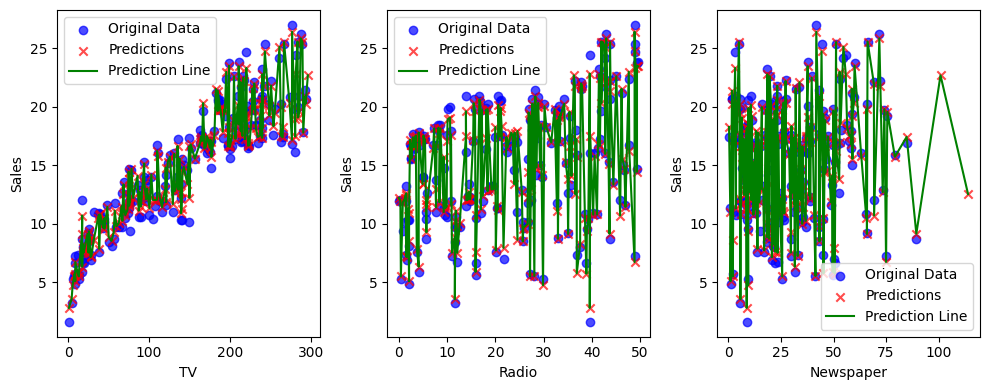

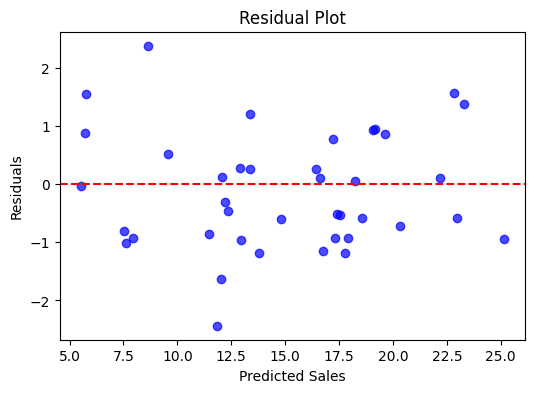

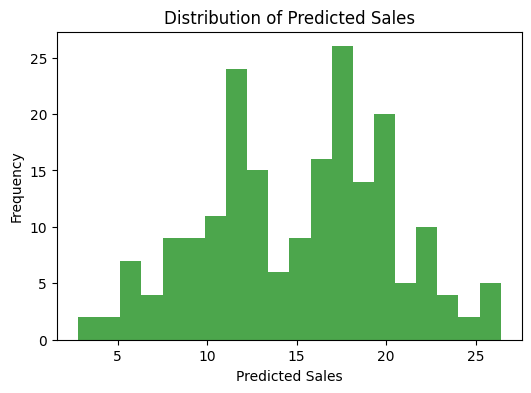

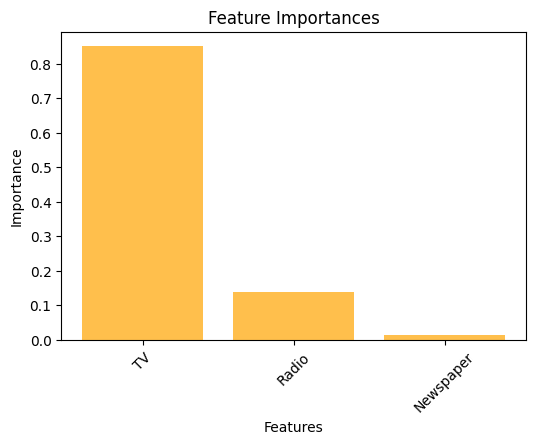

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load preprocessed data
data = pd.read_csv("/content/advertising.csv")

# Outlier Analysis
def detect_outliers(df, features):
    outlier_indices = []
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    return list(set(outlier_indices))

outlier_indices = detect_outliers(data, ['TV', 'Radio', 'Newspaper'])

# Remove outliers
data_cleaned = data.drop(outlier_indices, axis=0).reset_index(drop=True)

# Define features (X) and target variable (y) after removing outliers
X = data_cleaned.drop(columns=['Sales'])  # Features
y = data_cleaned['Sales']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE) after outlier removal:", rmse)

# Visualize scatter plots before making predictions
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    axes[i].scatter(data_cleaned[feature], data_cleaned['Sales'], color='blue', label='Original Data', alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sales')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Make predictions on new data
new_data = pd.read_csv('/content/advertising.csv')
new_data_features = new_data[['TV', 'Radio', 'Newspaper']]
predictions = model.predict(new_data_features)

# Convert predictions into a DataFrame
predictions_df = pd.DataFrame({'Predicted_Sales': predictions})

# Concatenate predictions with original data
comparison_df = pd.concat([new_data, predictions_df], axis=1)

# Display comparison
print("\nComparison between original data and predictions:")
print(comparison_df)

# Visualize scatter plots after making predictions
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    axes[i].scatter(data_cleaned[feature], data_cleaned['Sales'], color='blue', label='Original Data', alpha=0.7)
    axes[i].scatter(new_data[feature], predictions, color='red', label='Predictions', marker='x', alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sales')
    axes[i].legend()
    sorted_data = new_data.sort_values(by=feature)
    axes[i].plot(sorted_data[feature], model.predict(sorted_data[['TV', 'Radio', 'Newspaper']]), color='green', label='Prediction Line')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Additional Visualizations
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()

# Distribution of Predicted Sales
plt.figure(figsize=(6, 4))
plt.hist(predictions, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.show()

# Feature Importance Plot
feature_importances = model.feature_importances_
plt.figure(figsize=(6, 4))
plt.bar(X.columns, feature_importances, color='orange', alpha=0.7)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()
